In [25]:
%matplotlib inline

import numpy as np
import math
import cv2 as cv
from matplotlib import pyplot as plt

In [26]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Задание 1
 Написать программу, которая используя преобразование Хафа, находит все белые прямые линии (и только их) на картинке lines.jpg (у преподавателя). Можно проводить предобработку изображения: размытие, фильтрации, выделение границ. Найденные линии выделить (нарисовать) на картинке зеленым цветом, попробовать с толщиной линии 1px, 2px.

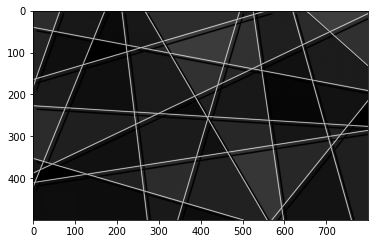

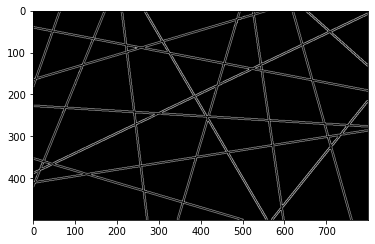

In [51]:
img = cv.imread('/home/qwe/Desktop/анализ изображений/lines.jpg')
print_img(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (9, 9), 0)  
edges = cv.Canny(gray, 50, 150, apertureSize=3)  
print_img(edges)


cv2.HoughLines(image, rho, theta, threshold[, lines[, srn[, stn[,min_theta[, max_theta]]]]]) -> lines
image – бинарное изображение.
threshold – возвращаются те линии, у которых количество «голосов» > threshold
lines – output vector of lines. Each line is represented by a two-element vector .
rho – distance resolution of the accumulator in pixels.
theta – angle resolution of the accumulator in radians.
srn – Для многомерного(multi-scale) преобразования Хафа это делитель для . Грубый
аккумулятор разрешенных дистанций это , точный аккумулятор это /srn . Если
одновременно srn=0 и stn=0 , то используется классическое преобразование Хофа. Иначе
оба параметра должны быть > 0.
stn – Для многомерного(multi-scale) преобразования Хафа это делитель для  0


81
15


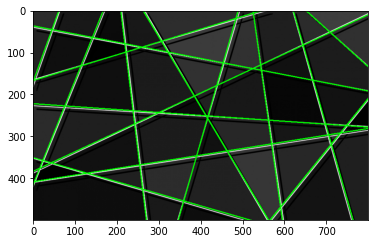

In [52]:
lines = cv.HoughLines(edges, 1.2, np.pi/180, 110)

arr = []
print(len(lines))
for i in range(len(lines)):
    f = 1
    for j in range(i):
        if np.abs(lines[i][0][0] - lines[j][0][0]) < 15 and np.abs(lines[i][0][1] - lines[j][0][1]) < np.pi/15:
            f = 0
            break
    if f == 1:
        arr.append(lines[i])
print(len(arr))
#arr = lines
# print(len(arr))

multiplier = 1000
for line in arr:
    [rho, theta] = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + multiplier * (-b))
    y1 = int(y0 + multiplier * a)
    x2 = int(x0 - multiplier * (-b))
    y2 = int(y0 - multiplier * a)
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

print_img(img)


# Задание 2
Написать программу, которая используя преобразование Хафа, находит на skyskeb_one.jpg (у преподавателя) только те линии, которые соответствуют вертикальным границам самого высокого здания. Можно проводить предобработку изображения: размытие, фильтрации, выделение границ. На всю ширину рисунка отобразить прямые, проходящие через эти линии, зеленым цветом.

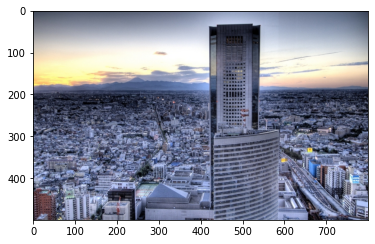

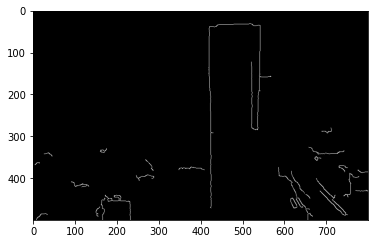

In [12]:
img = cv.imread('/home/qwe/Desktop/анализ изображений/skyskeb_one.jpg')
print_img(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (11, 11), 0)  # убираем случайные шумы
edges = cv.Canny(gray, 50, 220, apertureSize=3)  # получаем границы
print_img(edges)

In [13]:
lines = cv.HoughLines(edges, 1, np.pi/180, 110)

arr = []

for i in range(len(lines)):
    f = 1

    rho_i = lines[i][0][0]
    theta_i = lines[i][0][1]

    if rho_i < 0:
        rho_i = -rho_i
        theta_i = np.pi - theta_i

    for j in range(i):

        rho_j = lines[j][0][0]
        theta_j = lines[j][0][1]

        if rho_j < 0:
            rho_j = -rho_j
            theta_j = np.pi - theta_j

        if np.abs(rho_i - rho_j) < 30 and np.abs(theta_i - theta_j) < np.pi/15:
            f = 0
            break
    if f == 1:
        print(i, lines[i][0][0], lines[i][0][1])
        arr.append(lines[i])

0 424.0 0.0
2 543.0 0.017453292


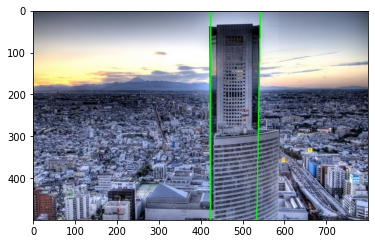

In [15]:
multiplier = 1000
for line in arr:
    [rho, theta] = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + multiplier * (-b))
    y1 = int(y0 + multiplier * a)
    x2 = int(x0 - multiplier * (-b))
    y2 = int(y0 - multiplier * a)
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

print_img(img)

# Задание 3
Находя совпадения по шаблону, выделить в черную рамку все зеленые квадраты на картинке square_many2.jpg и вывести их количество.

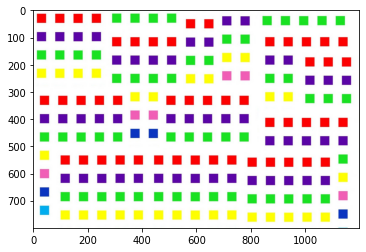

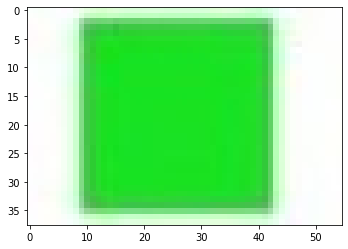

68


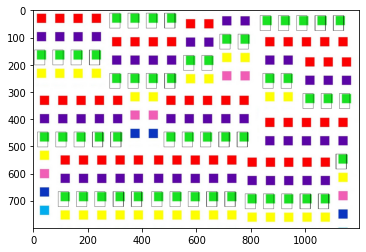

In [23]:
counter = 0
img_rgb = cv.imread('/home/qwe/Desktop/анализ изображений/square_many2.jpg')
img = cv.cvtColor(img_rgb, cv.COLOR_BGR2RGB)
template = cv.imread('/home/qwe/Desktop/анализ изображений/green.jpg')
print_img(img_rgb)
print_img(template)

width, height = template.shape[:2]
res = cv.matchTemplate(img_rgb, template, cv.TM_CCOEFF_NORMED)

threshold = 0.985
loc = np.where(res >= threshold)


for pt in zip(*loc[::-1]):
   # print(pt[0],pt[1])
    cv.rectangle(img_rgb, pt, (pt[0] + width, pt[1] + height), (0, 0, 0), 1)
    counter += 1
print(counter)
print_img(img_rgb)